In [616]:
import math
import numpy as np
from random import seed
from random import randint
from random import random
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.datasets.samples_generator import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()

In [748]:

def generate_random_dataset(size):
    # seed random number generator
    seed(random())
    # generate some integers
    dataset=[]
    for _ in range(size):
        dataset.append([randint(0,5), randint(0,5)])
    return dataset

In [789]:
def gaussian_similarity(x, y):
    sigma=0.05
    if not np.array_equal(x,y):
        return math.exp(-np.linalg.norm(np.subtract(x,y), 2)**2/(2*sigma**2))
    else:
        return 0

In [634]:
#weight matrix
def construct_weightmatrix(data):
    W = pairwise_distances(data, metric=gaussian_similarity)
    return W

In [635]:

def construct_degree_and_laplacian(W):
    # degree matrix
    D = np.diag(np.sum(np.array(W), axis=1))
    print('degree matrix:')
    print(D)
    # laplacian matrix
    L = D - W
    print('laplacian matrix:')
    print(L)
    return D,L

In [636]:
def calculate_egvalue_egvector(laplacian):
    e, v = np.linalg.eig(laplacian)
    # eigenvalues
    print('eigenvalues:')
    print(e)
    # eigenvectors
    print('eigenvectors:')
    print(v)
    return e,v

In [668]:
def spectralcluster(data,k):
    W = construct_weightmatrix(data)
    D,L = construct_degree_and_laplacian(W)
    e,v = calculate_egvalue_egvector(L)
    U = construct_u(k)
    km.labels_ = cluster_kmeans(k,U)
    return km.labels_

In [669]:
def visualizegraph(data, label):
    for [x,y] in data:
        plt.plot(x,y, colour((x,y),data, label))

In [781]:
data = np.array(generate_random_dataset(4))
print(data)



[[1 5]
 [5 5]
 [2 0]
 [5 0]]


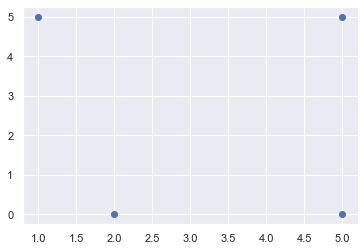

In [784]:
visualizegraph(data, [0,0,0,0])

In [782]:
#weight matrix
def construct_weightmatrix_euc(data):
    W = pairwise_distances(data, metric='euclidean')
    return W
W = construct_weightmatrix_euc(data)

def add_edge_to_graph(G,e1,e2,w):
    G.add_edge(e1,e2,weight=w) 

G = nx.Graph()
points = [(x,y) for [x,y] in data]  # (x,y) points
edges=[]
for x in range(len(W)):
    for y in range(len(W[0])):
        edges.append((x,y,W[x][y]))  # (v1,v2, weight)

for i in range(len(edges)):
    add_edge_to_graph(G,points[edges[i][0]], points[edges[i][1]], round(edges[i][2],3))

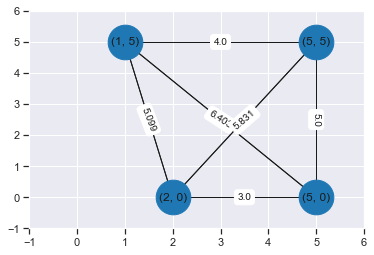

In [783]:
pos = {point: point for point in points}

# add axis
fig, ax = plt.subplots()
nx.draw(G, pos=pos, node_color='k', ax=ax)
nx.draw(G, pos=pos, node_size=1200, ax=ax)  # draw nodes and edges
nx.draw_networkx_labels(G, pos=pos)  # draw node labels/names
# draw edge weights
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)
plt.axis("on")
ax.set_xlim(-1, 6)
ax.set_ylim(-1,6)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.show()

degree matrix:
[[16.645 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 15.700 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 11.363 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 15.283 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 21.007 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 22.622]]
laplacian matrix:
[[16.645 -0.000 -0.053 ... -0.801 -0.000 -0.000]
 [-0.000 15.700 -0.000 ... -0.000 -0.486 -0.151]
 [-0.053 -0.000 11.363 ... -0.009 -0.000 -0.000]
 ...
 [-0.801 -0.000 -0.009 ... 15.283 -0.000 -0.000]
 [-0.000 -0.486 -0.000 ... -0.000 21.007 -0.607]
 [-0.000 -0.151 -0.000 ... -0.000 -0.607 22.622]]
eigenvalues:
[0.000 1.621 1.871 3.224 4.897 5.569 6.775 7.203 7.453 8.467 9.006 9.350
 9.790 10.056 10.143 7.758 7.758 10.768 11.043 27.538 27.377 26.998 26.809
 26.695 26.203 26.478 26.492 10.010 10.279 11.438 11.930 11.911 12.194
 26.045 26.052 25.807 25.731 25.407 25.535 25.601 25.601 10.010 11.220
 12.579 12.641 12.860 12.956 25.141 25.086 25.054 25.046 24.814 24.707
 25.293 13.080 13.117 1

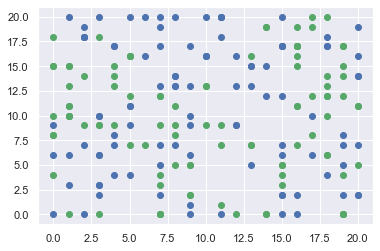

In [674]:
labels = spectralcluster(data,2)
visualizegraph(data, labels)

In [638]:
W = construct_weightmatrix(data)
D,L = construct_degree_and_laplacian(W)

degree matrix:
[[18.695 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 27.495 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 26.879 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 17.334 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 25.524 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 21.388]]
laplacian matrix:
[[18.695 -0.000 -0.000 ... -0.329 -0.000 -0.007]
 [-0.000 27.495 -0.895 ... -0.000 -0.062 -0.001]
 [-0.000 -0.895 26.879 ... -0.000 -0.056 -0.000]
 ...
 [-0.329 -0.000 -0.000 ... 17.334 -0.000 -0.027]
 [-0.000 -0.062 -0.056 ... -0.000 25.524 -0.236]
 [-0.007 -0.001 -0.000 ... -0.027 -0.236 21.388]]


In [639]:
e,v = calculate_egvalue_egvector(L)

eigenvalues:
[-0.000 1.622 1.754 3.184 4.770 5.543 6.362 7.209 7.704 7.952 8.796 7.436
 9.178 9.657 9.900 31.555 31.394 31.299 31.095 30.809 30.584 30.227 30.063
 29.914 29.720 29.494 29.414 29.097 29.130 28.803 28.673 10.489 11.073
 11.320 28.465 28.200 27.909 27.768 27.727 29.579 29.616 29.377 10.551
 11.626 11.872 12.041 12.343 27.321 27.242 27.462 27.452 26.916 26.833
 27.922 26.593 11.306 12.514 11.751 12.783 12.986 13.058 13.110 27.495
 25.522 25.718 26.286 26.273 26.194 26.067 26.023 25.291 13.383 27.157
 25.095 25.273 13.601 13.756 13.819 24.855 26.207 25.524 24.725 24.653
 24.511 14.518 14.444 14.288 14.206 14.007 24.350 24.300 24.204 23.994
 23.818 23.784 13.095 13.407 14.590 14.709 14.779 14.931 14.984 14.962
 15.390 23.510 15.661 15.618 15.750 15.848 15.939 16.060 16.304 23.972
 23.395 23.362 23.287 23.227 23.208 23.059 22.960 22.855 22.682 22.531
 23.617 22.405 16.495 16.713 22.231 14.029 16.543 16.974 17.165 17.301
 21.992 21.839 21.698 21.659 21.534 21.526 17.396 21.420 

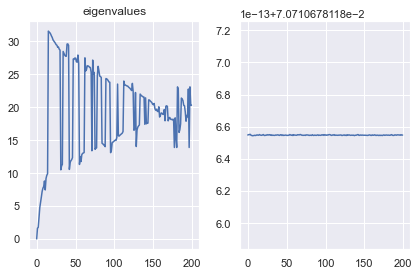

In [640]:
fig = plt.figure()

ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')

i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])

fig.tight_layout()
plt.show()

In [641]:
#Construct a matrix U containing the first k eigenvectors
def construct_u(k):
    idx = np.argpartition(e, k)
    U=v[:, idx[:k]]
    return U

In [642]:
#Cluster the points of rows of U with k means algorithm into k clusters
def cluster_kmeans(k,U):
    km = KMeans(init='k-means++', n_clusters=k)
    km.fit(U)
    return km.labels_

In [646]:
U = construct_u(2)
km.labels_ = cluster_kmeans(2,U)

200

In [540]:
def find_index(k,arr):
    inx=0
    for el in arr:
        if np.array_equal(k,el):
            break
        else:
            inx = inx +1
    return inx

In [663]:
def colour(n,data,label):
    index = find_index(n,data)
    if label[index] ==0:
        return 'bo'
    elif label[index]==1:
        return 'go'
    elif label[index]==2:
        return 'ro'
    else:
        return 'ko'

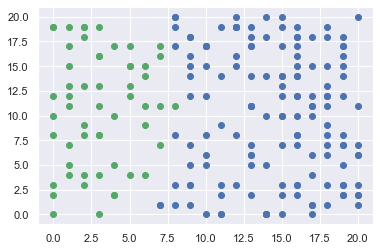

In [657]:
import matplotlib.pyplot as plt
for [x,y] in data:
    plt.plot(x,y, colour((x,y),data))

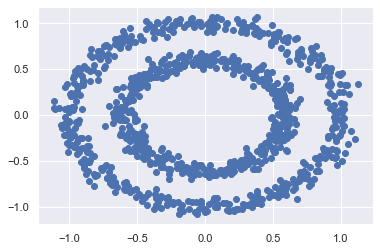

In [785]:
X, clusters = make_circles(n_samples=1000, noise=.05, factor=.6, random_state=0)
plt.scatter(X[:,0], X[:,1])

In [792]:
W = construct_weightmatrix(X)
D,L = construct_degree_and_laplacian(W)
e,v = calculate_egvalue_egvector(L)
U = construct_u(2)
km.labels_ = cluster_kmeans(2,U)
print(km.labels_)

degree matrix:
[[939.493 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 897.029 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 1217.769 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 888.117 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 935.553 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 930.731]]
laplacian matrix:
[[939.493 -0.854 -1.561 ... -0.823 -0.437 -1.140]
 [-0.854 897.029 -0.742 ... -1.017 -1.059 -0.997]
 [-1.561 -0.742 1217.769 ... -1.401 -1.652 -1.138]
 ...
 [-0.823 -1.017 -1.401 ... 888.117 -0.501 -0.425]
 [-0.437 -1.059 -1.652 ... -0.501 935.553 -0.906]
 [-1.140 -0.997 -1.138 ... -0.425 -0.906 930.731]]
eigenvalues:
[0.000 1459.248 1456.927 1328.047 1293.976 1292.995 1292.161 1286.821
 1283.109 1280.879 1278.829 1276.771 1275.793 1273.859 1272.604 1271.368
 1270.420 1268.572 1268.309 1267.167 1265.792 1263.771 1263.206 1262.188
 1261.228 1260.170 1258.555 1256.003 1253.851 1253.675 1253.016 1252.662
 1251.862 1251.068 1250.840 1248.527 1247.589 1247.128 1246.504 1245.705
 1245.23

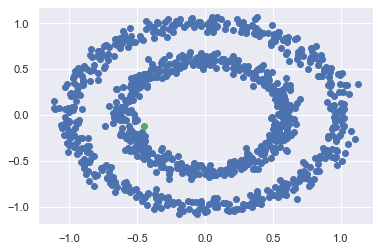

In [793]:
for [x,y] in X:
    plt.plot(x,y, colour((x,y),X,km.labels_))